In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

dataset = pd.read_csv('insurance.csv')
print(dataset.tail(15))

      age     sex   bmi  children smoker     region  expenses
1323   42  female  40.4         2    yes  southeast  43896.38
1324   31    male  25.9         1     no  northwest   4239.89
1325   61    male  33.5         0     no  northeast  13143.34
1326   42  female  32.9         0     no  northeast   7050.02
1327   51    male  30.0         1     no  southeast   9377.90
1328   23  female  24.2         2     no  northeast  22395.74
1329   52    male  38.6         2     no  southwest  10325.21
1330   57  female  25.7         2     no  southeast  12629.17
1331   23  female  33.4         0     no  southwest  10795.94
1332   52  female  44.7         3     no  southwest  11411.69
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36


      age  sex   bmi  children  smoker  expenses  northeast  northwest  \
0      19    0  27.9         0       1  16884.92          0          0   
1      18    1  33.8         1       0   1725.55          0          0   
2      28    1  33.0         3       0   4449.46          0          0   
3      33    1  22.7         0       0  21984.47          0          1   
4      32    1  28.9         0       0   3866.86          0          1   
...   ...  ...   ...       ...     ...       ...        ...        ...   
1333   50    1  31.0         3       0  10600.55          0          1   
1334   18    0  31.9         0       0   2205.98          1          0   
1335   18    0  36.9         0       0   1629.83          0          0   
1336   21    0  25.8         0       0   2007.95          0          0   
1337   61    0  29.1         0       1  29141.36          0          1   

      southeast  southwest  
0             0          1  
1             1          0  
2             1         

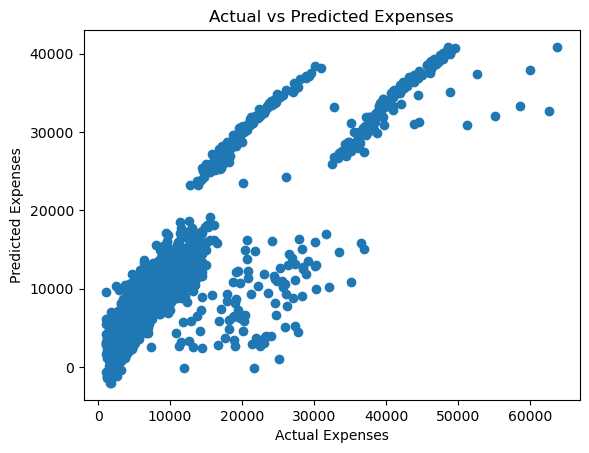

In [ ]:
dataset = pd.read_csv('insurance.csv')

dataset["smoker"] = dataset["smoker"].map({"yes": 1, "no": 0})
dataset["sex"] = dataset["sex"].map({"male": 1, "female": 0})
dataset = pd.get_dummies(dataset, columns=["region"], prefix='', prefix_sep='')
#dataset = pd.get_dummies(dataset, columns=["children"], prefix='children', prefix_sep='')

print(dataset)

y = dataset['expenses']
x = dataset[['age', 'bmi', 'children', "smoker", "sex", 'northeast', 'northwest', 'southeast']]
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

yhat = regr.predict(x)
plt.scatter(y, yhat)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Expenses')
plt.show()

In [ ]:
MAE = (abs(yhat - y)).mean()
print('Mean Absolute Error:', MAE)
#> 4170.73
# should be 3500 or less

Mean Absolute Error: 4170.730986790811
